# Baseline

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import numpy as np

In [2]:
# Load the dataset and print first rows
data = pd.read_csv('nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
# About the dataset
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [4]:
# Convert the target variable 'Hazardous' to numeric. 1 is True, 0 is False
if data['Hazardous'].dtype == 'bool':
    data['Hazardous'] = data['Hazardous'].astype(int)

- Here, we drop some irrelevant columns like the ones that have no different values, that are identifiers, that includes future dates (because it will not be available at the time of prediction) and the ones that have similar information but with different units.                           
- Dropping the target column is alse needed for training the model.
- Then we split into features and target.

In [5]:
# Separate features and target
X = data.drop(columns=['Neo Reference ID','Name','Orbit ID','Orbit Determination Date','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
                       'Close Approach Date','Epoch Date Close Approach','Relative Velocity km per sec','Miles per hour',
                       'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)','Orbiting Body','Equinox', 'Hazardous'])
y = data['Hazardous']

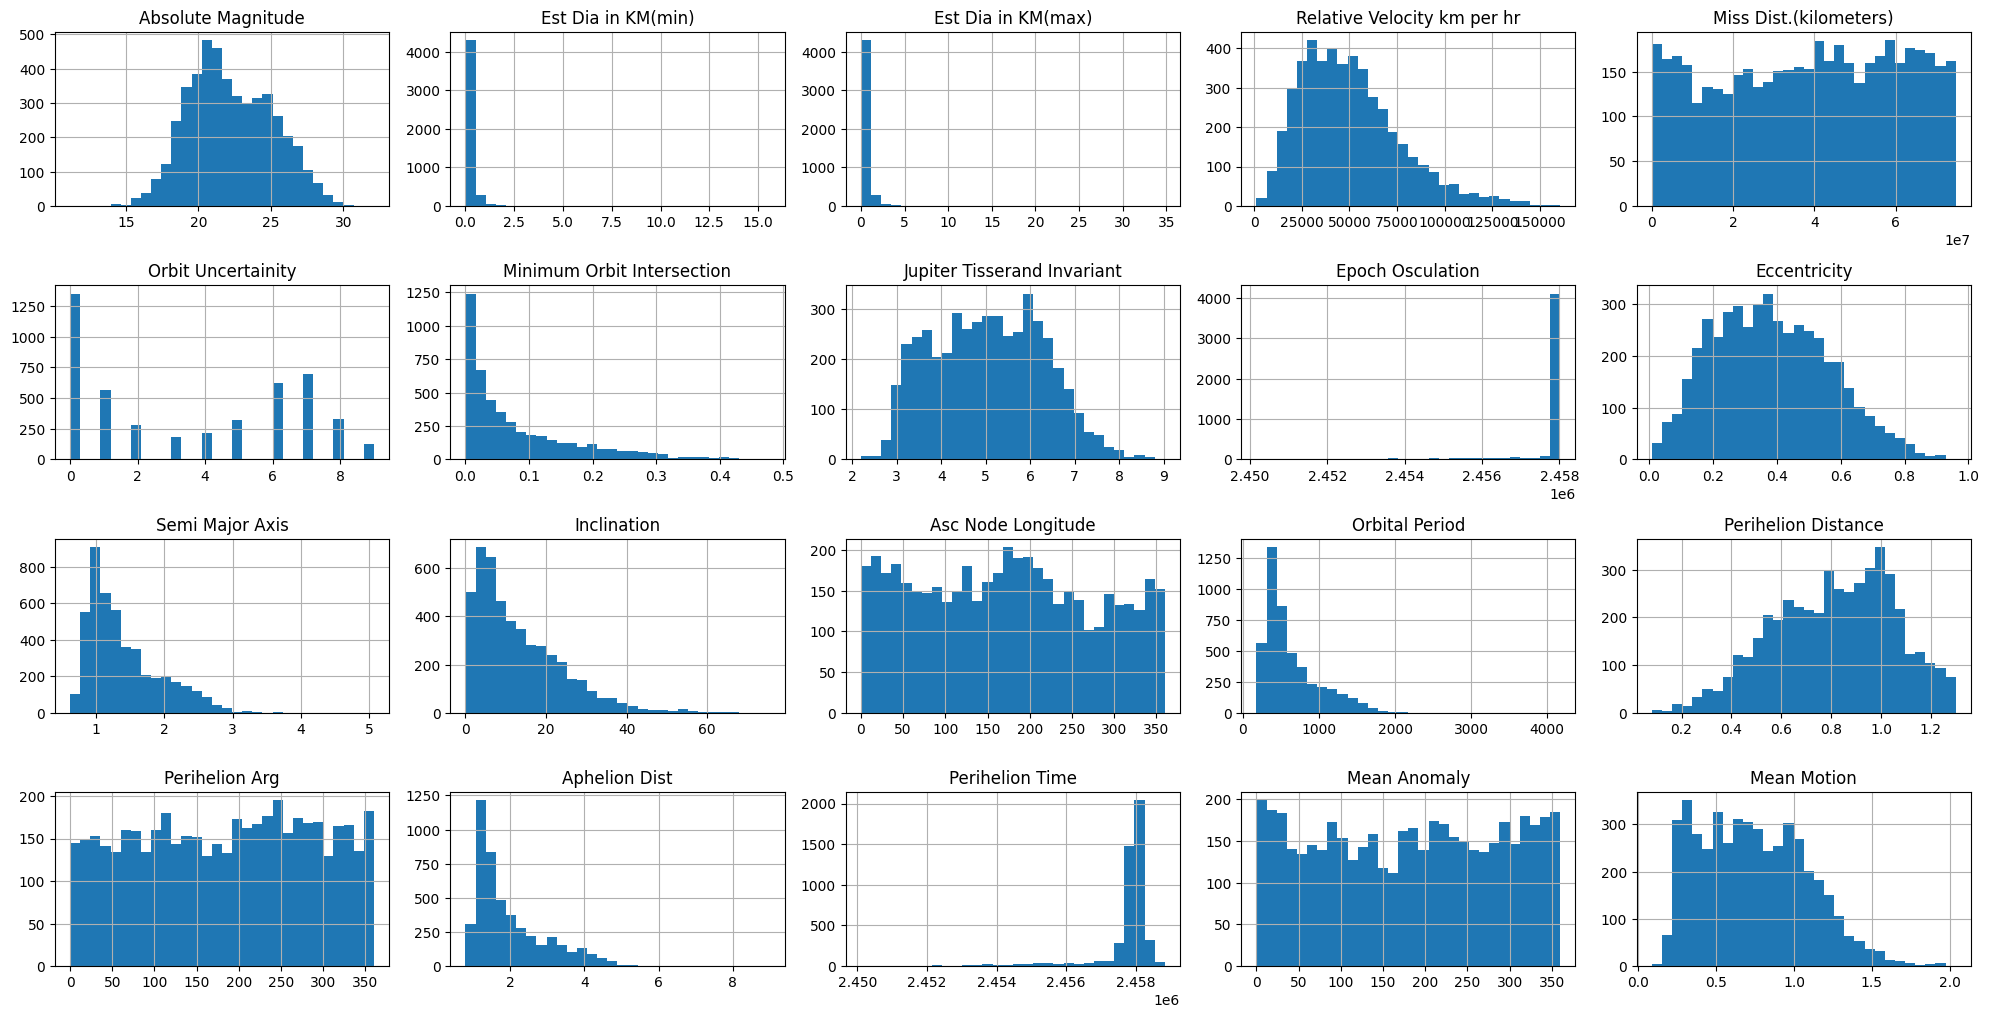

In [6]:
# Plot histograms for each feature
X.hist(bins=30, figsize=(20, 20), layout=(8, 5))
plt.tight_layout()
plt.show()

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Check shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (3749, 20)
Shape of y_train: (3749,)


In [9]:
# Check for NaN values in the entire DataFrame (X)
print("Number of NaN values in each feature column of X:")
print(X.isnull().sum())

# Check for NaN values in the target vector (y)
print("Number of NaN values in y:", y.isnull().sum())

Number of NaN values in each feature column of X:
Absolute Magnitude             0
Est Dia in KM(min)             0
Est Dia in KM(max)             0
Relative Velocity km per hr    0
Miss Dist.(kilometers)         0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
dtype: int64
Number of NaN values in y: 0


In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Using Logistic Regression

In [11]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9498933901918977
Confusion Matrix:
 [[768  23]
 [ 24 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       791
           1       0.84      0.84      0.84       147

    accuracy                           0.95       938
   macro avg       0.91      0.90      0.90       938
weighted avg       0.95      0.95      0.95       938



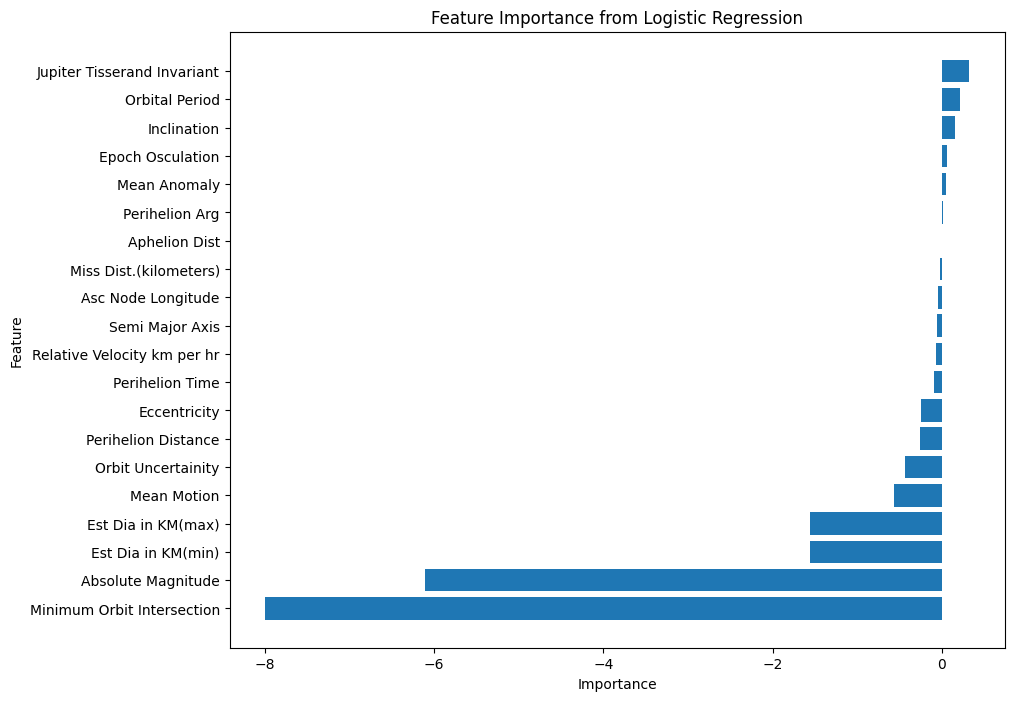

In [12]:
# Get feature importance
importance = lr_model.coef_[0]
feature_names = [col for col in data.columns if col not in ['Neo Reference ID','Name','Orbit ID','Orbit Determination Date','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
                       'Close Approach Date','Epoch Date Close Approach','Relative Velocity km per sec','Miles per hour',
                       'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)','Orbiting Body','Equinox', 'Hazardous']]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

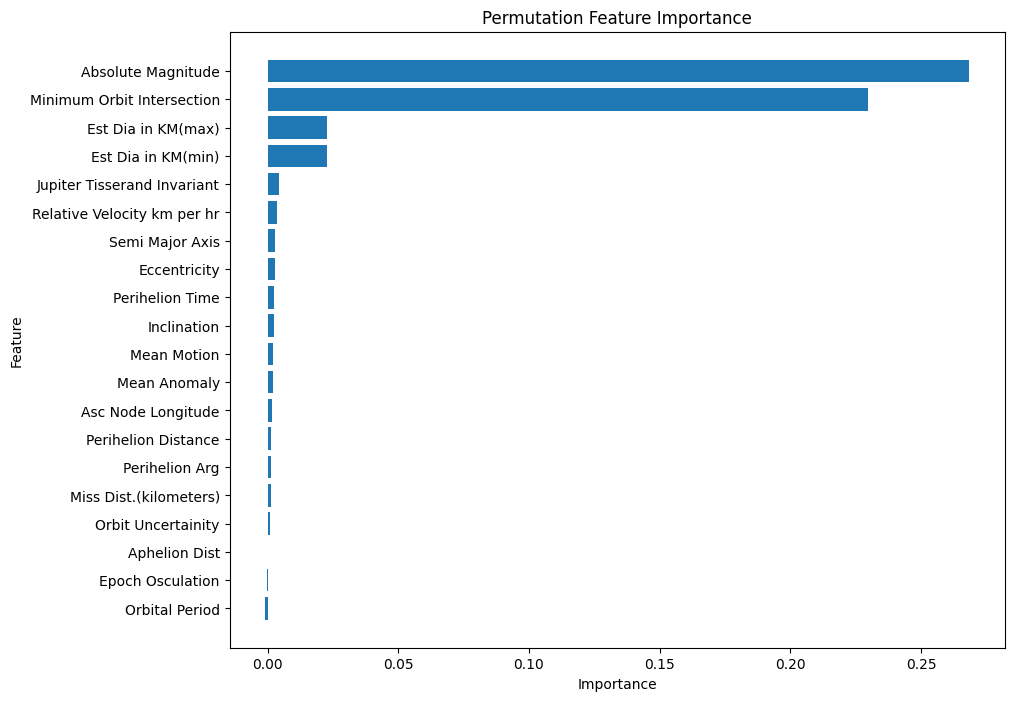

In [13]:
# Getting feature importance using permutation
# Calculate permutation importance
result = permutation_importance(lr_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for visualization
perm_importance = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
perm_importance = perm_importance.sort_values(by='Importance', ascending=False)

# Plot permutation importance
plt.figure(figsize=(10, 8))
plt.barh(perm_importance['Feature'], perm_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Using Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))
print("Classification Report:\n", classification_report(y_test, dt_y_pred))

Decision Tree Classifier
Accuracy: 0.9957356076759062
Confusion Matrix:
 [[788   3]
 [  1 146]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.98      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



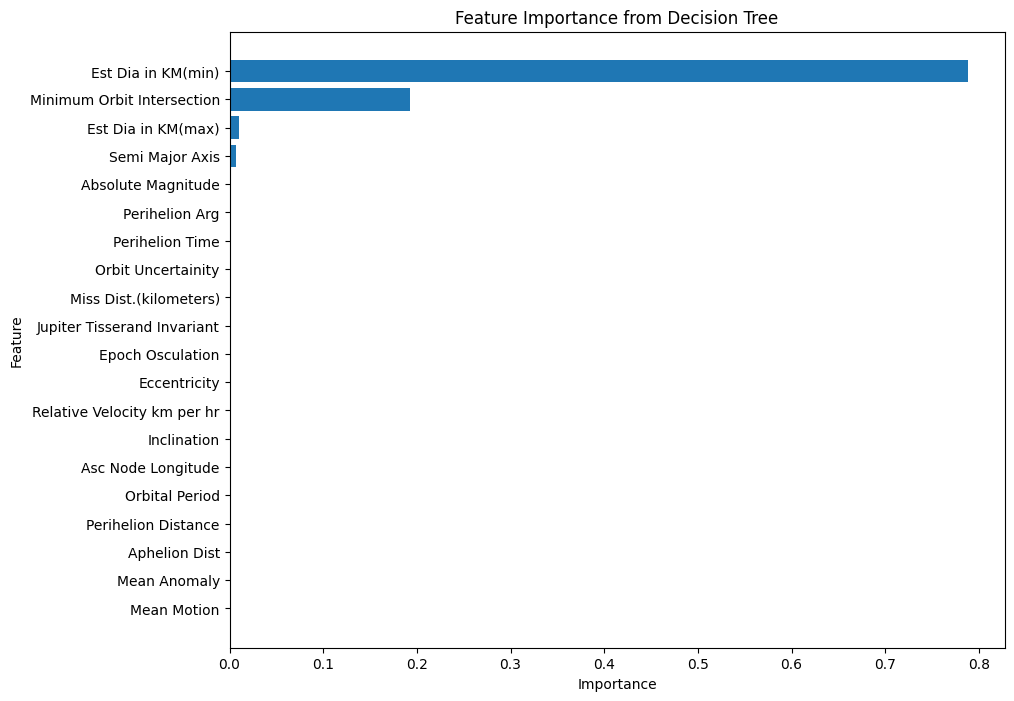

In [15]:
# Get feature importance
importance = dt_model.feature_importances_
feature_names = [col for col in data.columns if col not in ['Neo Reference ID', 'Name', 'Orbit ID', 'Orbit Determination Date', 
                                                            'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 
                                                            'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
                                                            'Close Approach Date', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 
                                                            'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 
                                                            'Miss Dist.(miles)', 'Orbiting Body', 'Equinox', 'Hazardous']]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

### Using Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Random Forest Classifier
Accuracy: 0.9968017057569296
Confusion Matrix:
 [[790   1]
 [  2 145]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



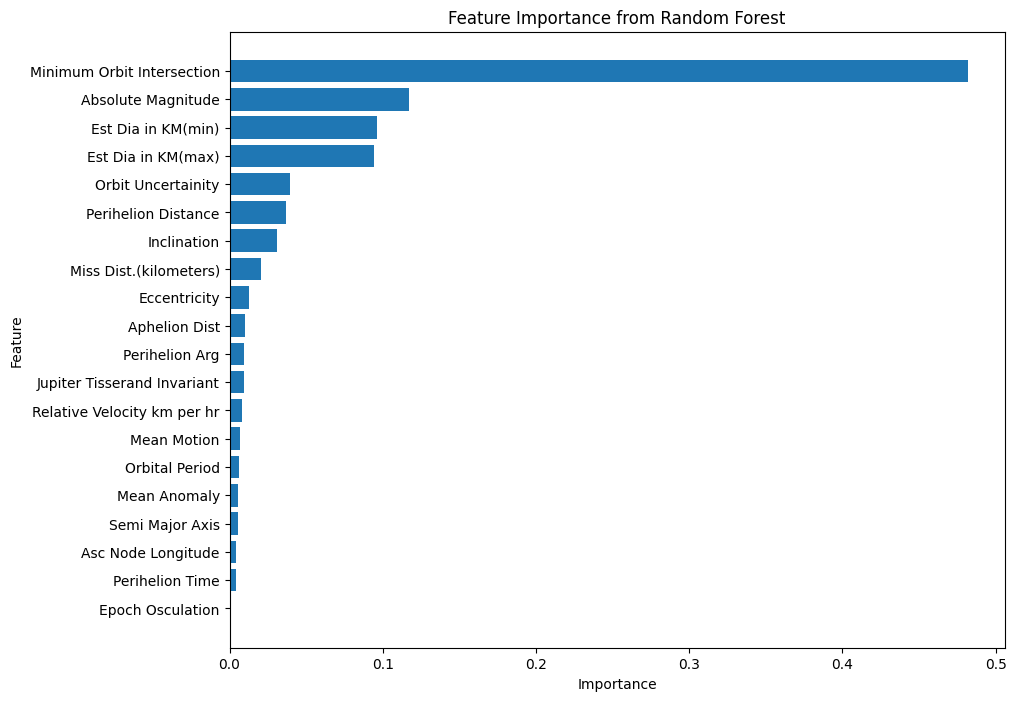

In [17]:
# Get feature importance
importance = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Evaluate and comparison

In [18]:
# Evaluate models
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, dt_y_pred),
        accuracy_score(y_test, rf_y_pred)
    ],
    'Confusion Matrix': [
        confusion_matrix(y_test, y_pred),
        confusion_matrix(y_test, dt_y_pred),
        confusion_matrix(y_test, rf_y_pred)
    ],
    'Classification Report': [
        classification_report(y_test, y_pred, output_dict=True),
        classification_report(y_test, dt_y_pred, output_dict=True),
        classification_report(y_test, rf_y_pred, output_dict=True)
    ]
}

# Convert metrics to DataFrame for comparison
metrics_df = pd.DataFrame(metrics)

# Print accuracy for each model
print(metrics_df[['Model', 'Accuracy']])

                 Model  Accuracy
0  Logistic Regression  0.949893
1        Decision Tree  0.995736
2        Random Forest  0.996802


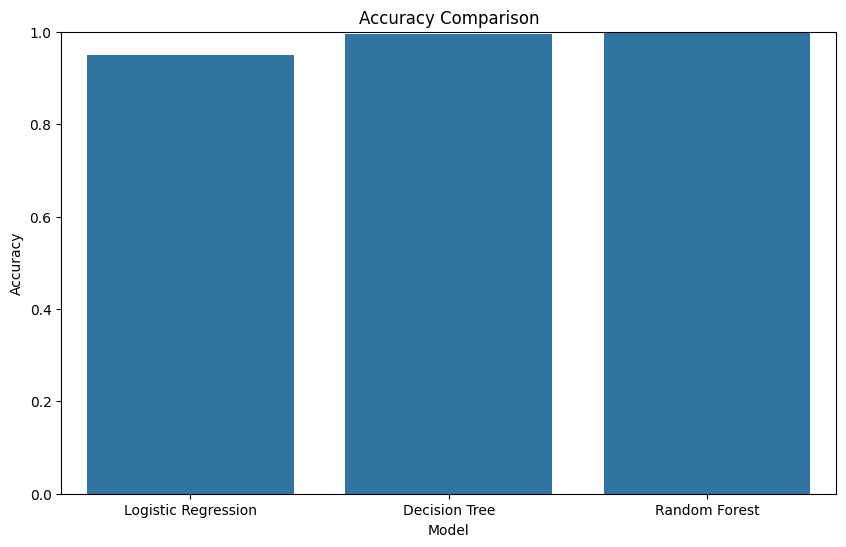

In [19]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

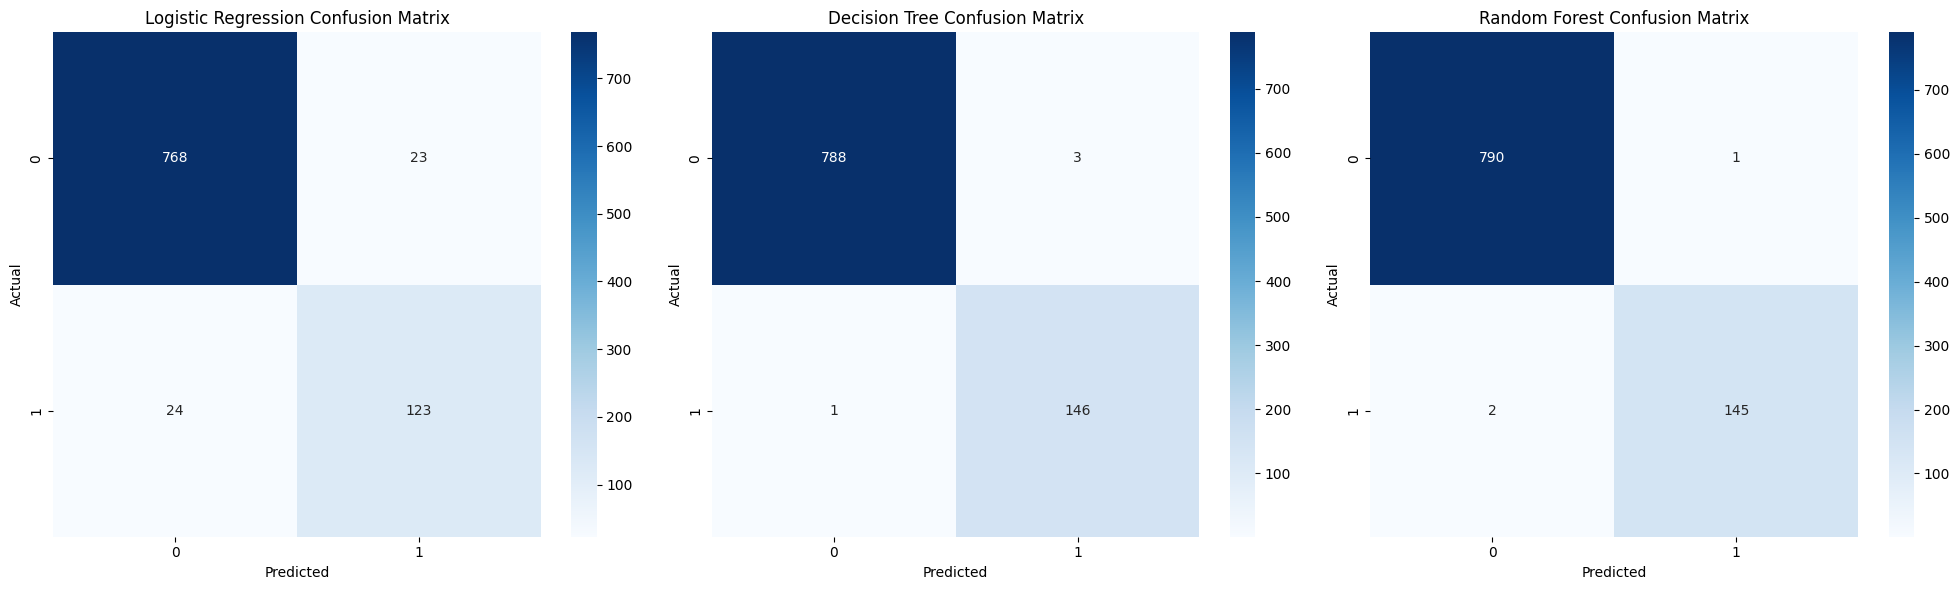

In [20]:
# Print and plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for idx, model in enumerate(metrics_df['Model']):
    sns.heatmap(metrics_df['Confusion Matrix'][idx], annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{model} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [21]:
# Print classification reports
for idx, model in enumerate(metrics_df['Model']):
    print(f"\nClassification Report for {model}:\n")
    print(pd.DataFrame(metrics_df['Classification Report'][idx]).transpose())


Classification Report for Logistic Regression:

              precision    recall  f1-score     support
0              0.969697  0.970923  0.970310  791.000000
1              0.842466  0.836735  0.839590  147.000000
accuracy       0.949893  0.949893  0.949893    0.949893
macro avg      0.906081  0.903829  0.904950  938.000000
weighted avg   0.949758  0.949893  0.949824  938.000000

Classification Report for Decision Tree:

              precision    recall  f1-score     support
0              0.998733  0.996207  0.997468  791.000000
1              0.979866  0.993197  0.986486  147.000000
accuracy       0.995736  0.995736  0.995736    0.995736
macro avg      0.989299  0.994702  0.991977  938.000000
weighted avg   0.995776  0.995736  0.995747  938.000000

Classification Report for Random Forest:

              precision    recall  f1-score     support
0              0.997475  0.998736  0.998105  791.000000
1              0.993151  0.986395  0.989761  147.000000
accuracy       0.996802  